In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd

# Plotting options, change to your liking
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: 

In [2]:


adata = sc.read_h5ad('/home/snu/Old_bin20.h5ad')

adata



AnnData object with n_obs × n_vars = 69070 × 30288
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'spatial_leiden', 'louvain', 'phenograph', 'orig.ident', 'x', 'y'
    var: 'n_cells', 'n_counts', 'mean_umi', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bin_size', 'bin_type', 'gene_exp_leiden', 'gene_exp_louvain', 'gene_exp_phenograph', 'gene_exp_spatial_leiden', 'hvg', 'key_record', 'merged', 'neighbors', 'pca_variance_ratio', 'rank_genes_groups', 'rank_genes_groups_filtered', 'resolution', 'sn', 'spatial_neighbors'
    obsm: 'X_pca', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances', 'spatial_neighbors_connectivities', 'spatial_neighbors_distances'

In [3]:
sc.tl.leiden(adata)
adata.obs['spatial_leiden'] = ['Clust. {0}'.format(i) for i in adata.obs['spatial_leiden']]


/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


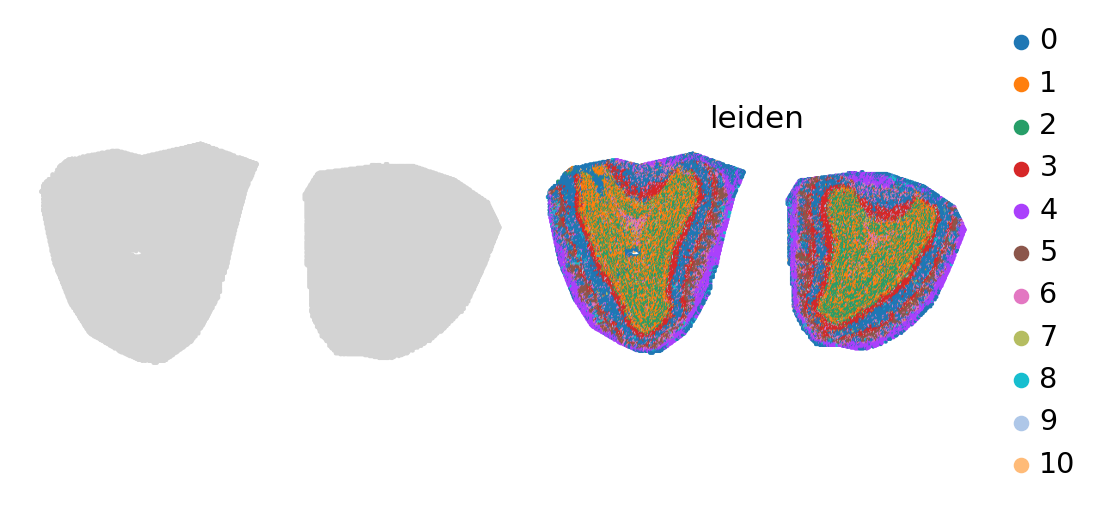

In [4]:
sc.pl.spatial(adata, color=[None, 'leiden'], size=1.5, wspace=0, frameon=False, spot_size = 50)



/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


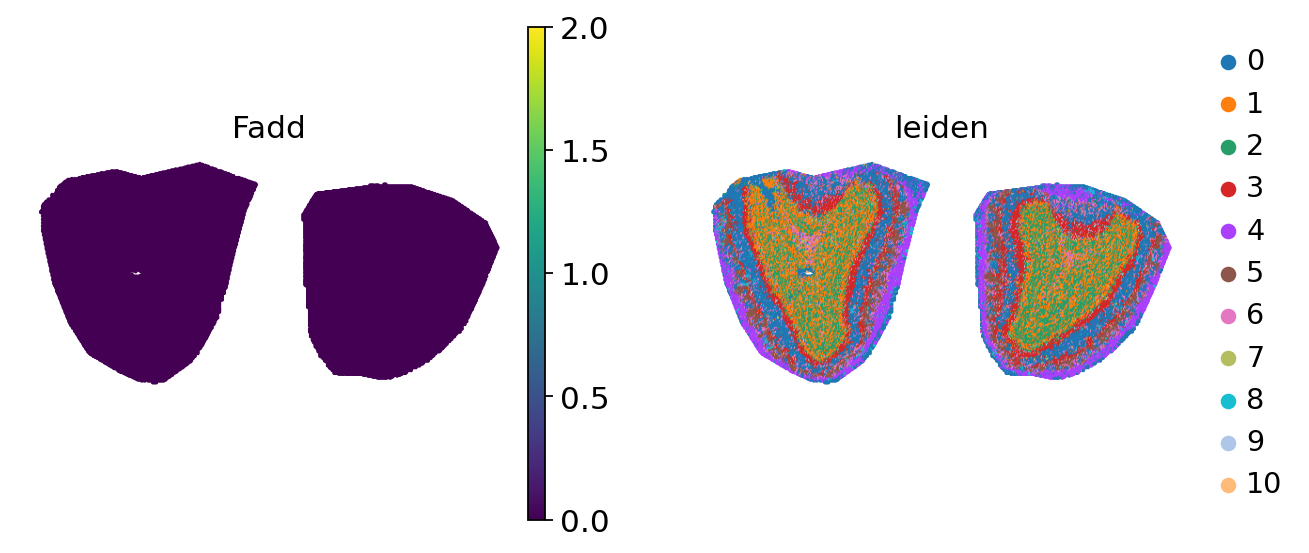

In [6]:
sc.pl.spatial(
    adata,
    color=['Fadd', 'leiden'],
    size=1.5,
    frameon=False,
    spot_size = 50,
)


In [6]:
net = dc.get_collectri(organism='mouse', split_complexes=False)
net

/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/liana/resource/_orthology.py:199: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


,source,target,weight
0,AP1,Aanat,1
1,AP1,Abca1,-1
2,AP1,Abcb11,1
3,AP1,Abcc1,1
4,AP1,Abcc3,1
...,...,...,...
36862,Zxdc,Cdkn1c,1
36863,Zxdc,Cdkn2a,1
36864,Zxdc,Ciita,1
36865,Zxdc,H2-T23,1


In [7]:
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False
)

44 features of mat are empty, they will be removed.
Running ulm on mat with 69070 samples and 30244 targets for 681 sources.


In [8]:
adata.obsm['ulm_estimate']


,AP1,Abl1,Ahr,Aip,Aire,Apex1,Ar,Arid1a,Arid1b,Arid3a,...,Zfpm1,Zfpm2,Zglp1,Zgpat,Zhx2,Zic1,Zic2,Zkscan7,Zmynd8,Zxdc
29978871735440,0.005616,-0.343834,-1.025842,0.127439,-0.382054,-0.581301,-3.119561,-0.384654,-0.367650,-0.071715,...,-0.552229,-0.278242,-0.441914,0.075466,-0.065151,-1.231837,-0.876352,-0.428873,-0.360510,0.107415
29978871735460,-1.888292,-0.328857,1.463210,0.125087,-0.373080,-0.568263,0.249524,-0.369538,-0.352675,-0.079867,...,-0.525414,-0.272896,-0.431714,0.058399,-0.044662,-1.162871,-0.819627,-0.415696,-0.330747,0.088561
30064771081340,-4.749065,-0.517107,-1.396910,0.164699,-0.509957,-0.770711,-4.678552,-0.564684,-0.544166,-0.012803,...,-0.853801,-0.361362,-0.588338,0.229652,-0.246770,-1.981720,-1.474395,-0.598611,-0.660708,0.281040
30064771081360,-4.391555,-0.342085,1.617749,0.126631,-0.379727,-0.577728,-2.496216,-0.382615,-0.365727,-0.070785,...,-0.549558,-0.276487,-0.439213,0.075772,-0.065704,-1.226337,-0.872823,-0.426416,-0.359381,0.107579
30064771081380,-3.919885,-0.417791,-1.181645,0.142867,-0.435506,-0.660318,-2.752846,-0.461251,-0.442836,-0.044892,...,-0.681357,-0.312712,-0.503065,0.143327,-0.145296,-1.554172,-1.134367,-0.500502,-0.490733,0.183632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71640054507420,-0.736740,-0.331644,0.210576,0.128632,-0.382198,-0.582621,-2.297653,-0.373942,-0.356470,-0.089305,...,-0.527720,-0.280471,-0.442403,0.048188,-0.031327,0.707226,1.828715,-0.423494,-0.322626,0.078297
71640054507440,-1.749668,-0.302842,1.583105,0.131118,-0.381743,1.047572,0.110129,-0.348464,-0.329949,-0.129695,...,-0.470100,6.331952,-0.442618,-0.014832,0.046757,0.400014,1.309200,-0.410213,-0.234576,0.010973
71640054507460,2.479424,-0.289515,-1.058288,0.143248,-0.407851,2.164701,1.174507,-0.342301,-0.321244,-0.187089,...,-0.433962,-2.311717,-0.473778,-0.091291,0.143474,2.259822,0.972343,-0.422959,-0.145573,-0.068838
71725953853320,0.779622,-0.303009,0.051899,0.131483,3.141518,0.949471,-1.441250,-0.348806,-0.330226,-0.130797,...,-0.470107,8.678601,-0.443689,-0.016099,0.048396,0.132818,0.931579,6.192811,-0.233420,0.009683


In [9]:
adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()
adata



AnnData object with n_obs × n_vars = 69070 × 30288
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'spatial_leiden', 'louvain', 'phenograph', 'orig.ident', 'x', 'y'
    var: 'n_cells', 'n_counts', 'mean_umi', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bin_size', 'bin_type', 'gene_exp_leiden', 'gene_exp_louvain', 'gene_exp_phenograph', 'gene_exp_spatial_leiden', 'hvg', 'key_record', 'merged', 'neighbors', 'pca_variance_ratio', 'rank_genes_groups', 'rank_genes_groups_filtered', 'resolution', 'sn', 'spatial_neighbors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'spatial', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'
    obsp: 'connectivities', 'distances', 'spatial_neighbors_connectivities', 'spatial_neighbors_distances'

In [10]:
acts = dc.get_acts(adata, obsm_key='collectri_ulm_estimate')
acts

AnnData object with n_obs × n_vars = 69070 × 681
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'spatial_leiden', 'louvain', 'phenograph', 'orig.ident', 'x', 'y'
    uns: 'bin_size', 'bin_type', 'gene_exp_leiden', 'gene_exp_louvain', 'gene_exp_phenograph', 'gene_exp_spatial_leiden', 'hvg', 'key_record', 'merged', 'neighbors', 'pca_variance_ratio', 'rank_genes_groups', 'rank_genes_groups_filtered', 'resolution', 'sn', 'spatial_neighbors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'spatial', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'

In [11]:
df = dc.rank_sources_groups(acts, groupby='leiden', reference='rest', method='t-test_overestim_var')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,0,rest,Hoxb1,39.018226,0.518994,0.000000e+00,0.000000e+00
1,0,rest,Mecp2,34.697554,0.613615,1.000102e-258,5.238995e-257
2,0,rest,Rest,33.754079,0.674868,3.377073e-245,1.642705e-243
3,0,rest,Stox1,23.459533,0.293173,1.372866e-120,2.332367e-119
4,0,rest,Hoxa2,18.438022,0.228895,1.715886e-75,1.645800e-74
...,...,...,...,...,...,...,...
7486,9,rest,Zxdc,-6.289833,-0.120618,6.241248e-10,2.361272e-08
7487,9,rest,Zbtb18,-9.011365,-1.056608,8.557223e-19,1.165494e-16
7488,9,rest,Stox1,-9.049768,-0.747870,6.893995e-19,1.165494e-16
7489,9,rest,Foxg1,-10.462166,-0.910944,1.793384e-24,4.070982e-22


In [12]:
n_markers = 3
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'0': ['Hoxb1', 'Mecp2', 'Rest'],
 '1': ['Myc', 'Six3', 'Rxrg'],
 '10': ['Hoxb1', 'Rest', 'Hoxa2'],
 '2': ['Foxq1', 'Tbr1', 'Mecom'],
 '3': ['En1', 'Nr4a2', 'Pou2f2'],
 '4': ['Tfap2b', 'Lhx1', 'Rest'],
 '5': ['Ar', 'Myc', 'Hand1'],
 '6': ['Lrrfip1', 'Sox2', 'Nfe2l3'],
 '7': ['Olig1', 'Myt1', 'Nkx2-2'],
 '8': ['Rest', 'Tfap2b', 'Hoxb1'],
 '9': ['Tbr1', 'Trp53', 'Ar']}

/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


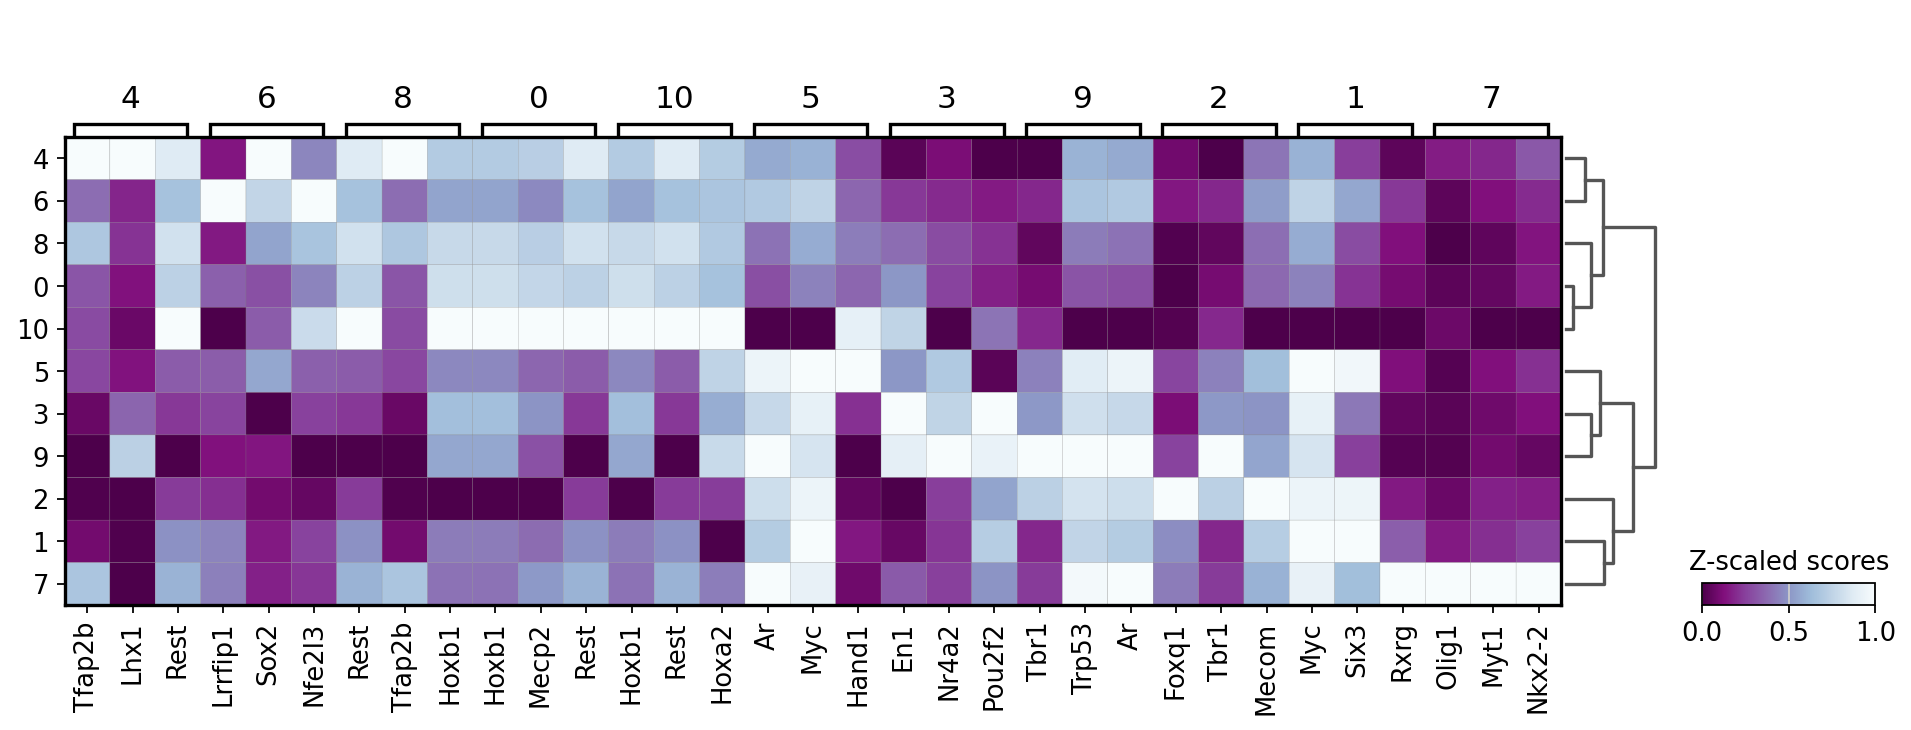

In [13]:
sc.pl.matrixplot(acts, source_markers, 'leiden', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores',  cmap='BuPu_r')

In [14]:
progeny = dc.get_progeny(organism = "mouse", top = 500)
progeny

/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/liana/resource/_orthology.py:199: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


,source,target,weight,p_value
0,Androgen,Tmprss2,11.490631,0.0
1,Androgen,Nkx3-1,10.622551,0.0
2,Androgen,Mboat2,10.472733,0.0
3,Androgen,Slc38a4,7.363805,0.0
4,Androgen,Mtmr9,6.130646,0.0
...,...,...,...,...
6995,p53,Wnt9a,1.932573,0.000002
6996,p53,Syk,1.903886,0.000002
6997,p53,Cdo1,1.934397,0.000002
6998,p53,Wbp11,-2.148036,0.000002


In [15]:
import pandas as pd

# Example: Assuming `net` is your pandas DataFrame with gene pathway data

# Remove duplicate rows based on `.source` and `.target`
pro_cleaned = progeny.drop_duplicates(subset=["source", "target"])



In [16]:
dc.run_mlm(
    mat=adata,
    net=pro_cleaned,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False
)

# Store in new obsm keys
adata.obsm['progeny_mlm_estimate'] = adata.obsm['mlm_estimate'].copy()
adata.obsm['progeny_mlm_pvals'] = adata.obsm['mlm_pvals'].copy()

44 features of mat are empty, they will be removed.


/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/decoupler/pre.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Running mlm on mat with 69070 samples and 30244 targets for 14 sources.


In [17]:
adata.obsm['progeny_mlm_estimate']

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
29978871735440,0.295216,-0.099760,-0.884014,-1.324266,4.629118,0.924863,-1.177335,3.708150,-1.114520,1.259022,-0.821311,-1.202646,-1.207345,1.804848
29978871735460,-0.881522,-0.020399,-0.663258,1.957688,-0.204252,-0.089659,-0.088628,-1.522431,-1.030046,-0.287058,-0.799792,-0.340087,-0.584682,1.680577
30064771081340,-1.934738,2.079968,0.071900,-1.245127,-0.367963,1.255575,1.824874,4.010793,-0.224369,-1.344281,1.134722,1.307989,-0.252869,1.012225
30064771081360,1.663639,0.499019,-1.084555,2.346065,-0.222249,-0.012610,0.436355,1.545618,-1.087814,-0.989927,1.946542,-0.425920,-0.234061,0.528405
30064771081380,-1.942473,1.197123,-0.627091,-1.738144,-0.694484,-1.077700,0.781996,1.187130,-1.188779,-0.827028,-0.910914,-0.337610,-0.272245,0.717196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71640054507420,0.621996,0.168325,0.383290,1.478793,0.955809,-0.778886,-0.791797,0.048735,1.311904,0.668128,0.471706,0.504468,0.007932,-4.878272
71640054507440,1.779983,1.608425,0.386417,0.296803,-0.704650,-0.748857,0.339424,-1.679156,0.790299,-0.499614,1.643988,1.852583,-1.470538,0.289005
71640054507460,3.175279,0.389151,0.929194,1.122900,0.164832,-1.562547,-0.589929,-0.269810,-0.349611,2.191709,-1.198500,-0.316307,1.244404,0.487316
71725953853320,0.298130,1.127443,-0.223655,-0.021550,4.317157,-1.643912,-1.473979,-2.303992,-2.413757,0.819064,0.572189,0.245290,1.487315,-4.101776


In [18]:
acts = dc.get_acts(adata, obsm_key='progeny_mlm_estimate')
acts

AnnData object with n_obs × n_vars = 69070 × 14
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'spatial_leiden', 'louvain', 'phenograph', 'orig.ident', 'x', 'y'
    uns: 'bin_size', 'bin_type', 'gene_exp_leiden', 'gene_exp_louvain', 'gene_exp_phenograph', 'gene_exp_spatial_leiden', 'hvg', 'key_record', 'merged', 'neighbors', 'pca_variance_ratio', 'rank_genes_groups', 'rank_genes_groups_filtered', 'resolution', 'sn', 'spatial_neighbors', 'leiden', 'leiden_colors', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap', 'spatial', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals', 'mlm_estimate', 'mlm_pvals', 'progeny_mlm_estimate', 'progeny_mlm_pvals'

/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


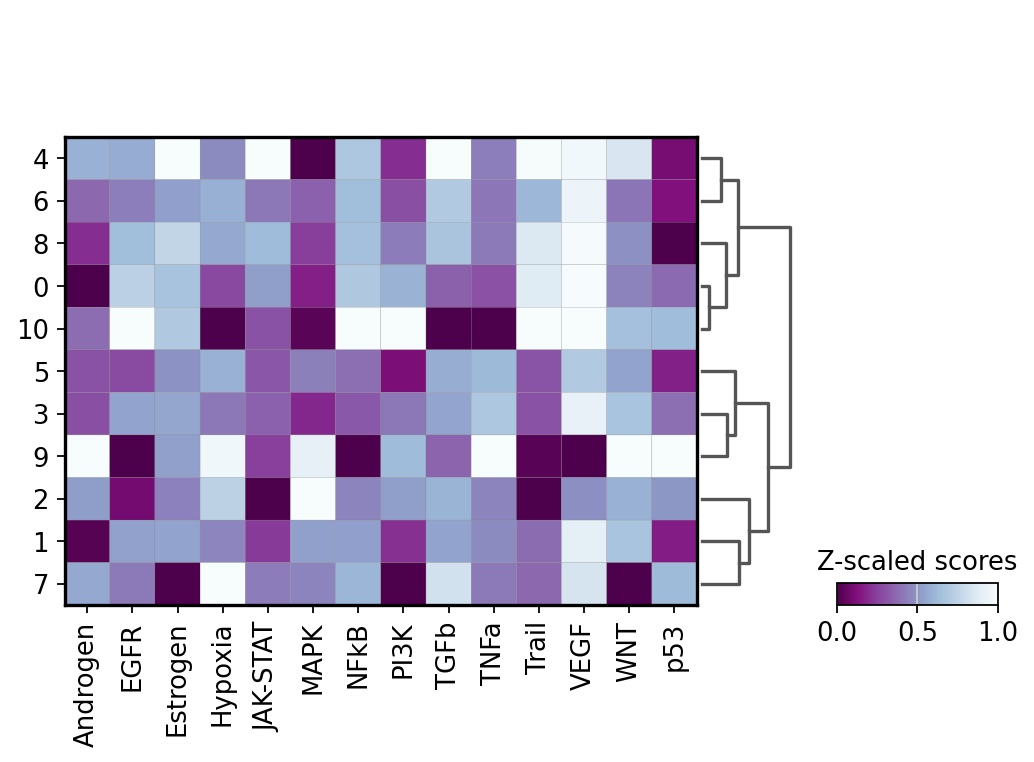

In [19]:
sc.pl.matrixplot(acts, var_names=acts.var_names, groupby='leiden', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='BuPu_r')

In [28]:
msigdb = dc.get_resource('MSigDB', organism='mouse')
msigdb

/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/liana/resource/_orthology.py:199: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


,genesymbol,collection,geneset
0,A1bg,immunesigdb,GSE25088_CTRL_VS_IL4_AND_ROSIGLITAZONE_STIM_MA...
1,A1bg,tf_targets_legacy,TGTTTGY_HNF3_Q6
2,A1bg,positional,chr19q13
3,A1bg,cell_type_signatures,GAO_LARGE_INTESTINE_ADULT_CI_MESENCHYMAL_CELLS
4,A1bg,go_cellular_component,GOCC_EXTERNAL_ENCAPSULATING_STRUCTURE
...,...,...,...
3607398,Zzz3,go_biological_process,GOBP_MACROMOLECULE_DEACYLATION
3607399,Zzz3,go_biological_process,GOBP_CELL_CYCLE
3607400,Zzz3,tf_targets_gtrf,ZNF507_TARGET_GENES
3607401,Zzz3,immunesigdb,GSE3982_NEUTROPHIL_VS_EFF_MEMORY_CD4_TCELL_DN


In [29]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='go_biological_process']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('GOBP_')[1] for name in msigdb['geneset']]

msigdb

,genesymbol,collection,geneset
73,A1cf,go_biological_process,MRNA_METABOLIC_PROCESS
78,A1cf,go_biological_process,EMBRYO_IMPLANTATION
84,A1cf,go_biological_process,MACROMOLECULE_CATABOLIC_PROCESS
87,A1cf,go_biological_process,MRNA_MODIFICATION
88,A1cf,go_biological_process,RNA_PROCESSING
...,...,...,...
3607352,Zzz3,go_biological_process,PROTEIN_ACYLATION
3607360,Zzz3,go_biological_process,HISTONE_H3_ACETYLATION
3607378,Zzz3,go_biological_process,REGULATION_OF_MULTICELLULAR_ORGANISMAL_DEVELOP...
3607398,Zzz3,go_biological_process,MACROMOLECULE_DEACYLATION


In [30]:
dc.run_ora(
    mat=adata,
    net=msigdb,
    source='geneset',
    target='genesymbol',
    verbose=True,
    use_raw=False
)

# Store in a different key
adata.obsm['msigdb_ora_estimate'] = adata.obsm['ora_estimate'].copy()
adata.obsm['msigdb_ora_pvals'] = adata.obsm['ora_pvals'].copy()

44 features of mat are empty, they will be removed.
Running ora on mat with 69070 samples and 30244 targets for 7351 sources.


  0%|          | 0/69070 [00:00<?, ?it/s]

In [31]:
adata.obsm['msigdb_ora_estimate'].iloc[:, 0:5]

source,10_FORMYLTETRAHYDROFOLATE_METABOLIC_PROCESS,2FE_2S_CLUSTER_ASSEMBLY,2_OXOGLUTARATE_METABOLIC_PROCESS,3_PHOSPHOADENOSINE_5_PHOSPHOSULFATE_METABOLIC_PROCESS,3_UTR_MEDIATED_MRNA_DESTABILIZATION
29978871735440,-0.0,-0.000000,-0.0,-0.0,-0.000000
29978871735460,-0.0,-0.000000,-0.0,-0.0,-0.000000
30064771081340,-0.0,-0.000000,-0.0,-0.0,-0.000000
30064771081360,-0.0,-0.000000,-0.0,-0.0,-0.000000
30064771081380,-0.0,-0.000000,-0.0,-0.0,-0.000000
...,...,...,...,...,...
71640054507420,-0.0,-0.000000,-0.0,-0.0,-0.000000
71640054507440,-0.0,0.263832,-0.0,-0.0,0.132184
71640054507460,-0.0,-0.000000,-0.0,-0.0,-0.000000
71725953853320,-0.0,-0.000000,-0.0,-0.0,-0.000000


In [32]:
acts = dc.get_acts(adata, obsm_key='msigdb_ora_estimate')

# We need to remove inf and set them to the maximum value observed
acts_v = acts.X.ravel()
max_e = np.nanmax(acts_v[np.isfinite(acts_v)])
acts.X[~np.isfinite(acts.X)] = max_e

acts

AnnData object with n_obs × n_vars = 69070 × 7351
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'spatial_leiden', 'louvain', 'phenograph', 'orig.ident', 'x', 'y'
    uns: 'bin_size', 'bin_type', 'gene_exp_leiden', 'gene_exp_louvain', 'gene_exp_phenograph', 'gene_exp_spatial_leiden', 'hvg', 'key_record', 'merged', 'neighbors', 'pca_variance_ratio', 'rank_genes_groups', 'rank_genes_groups_filtered', 'resolution', 'sn', 'spatial_neighbors', 'leiden', 'leiden_colors', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap', 'spatial', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals', 'mlm_estimate', 'mlm_pvals', 'progeny_mlm_estimate', 'progeny_mlm_pvals', 'ora_estimate', 'ora_pvals', 'msigdb_ora_estimate', 'msigdb_ora_pvals'

In [33]:
df = dc.rank_sources_groups(acts, groupby='leiden', reference='rest', method='t-test_overestim_var')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,0,rest,NEGATIVE_REGULATION_OF_URINE_VOLUME,172.777346,0.351583,0.000000e+00,0.000000e+00
1,0,rest,FUSED_ANTRUM_STAGE,161.095053,0.296552,0.000000e+00,0.000000e+00
2,0,rest,ERBB2_EGFR_SIGNALING_PATHWAY,159.560312,0.230105,0.000000e+00,0.000000e+00
3,0,rest,ANTRAL_OVARIAN_FOLLICLE_GROWTH,150.545452,0.182263,0.000000e+00,0.000000e+00
4,0,rest,POSITIVE_REGULATION_OF_SYSTEMIC_ARTERIAL_BLOOD...,145.726234,0.232478,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
80856,9,rest,NEURAL_CREST_CELL_FATE_COMMITMENT,-33.641984,-0.338813,8.328305e-143,7.652672e-140
80857,9,rest,STRIATED_MUSCLE_ATROPHY,-34.834432,-0.259736,6.906306e-173,1.269206e-169
80858,9,rest,POSITIVE_REGULATION_OF_SKELETAL_MUSCLE_FIBER_D...,-38.005142,-0.289506,2.467429e-195,9.069034e-192
80859,9,rest,MUSCLE_CELL_FATE_COMMITMENT,-38.756500,-0.401236,4.749701e-174,1.163835e-170


In [36]:
n_top = 2
term_markers = df.groupby('group').head(n_top).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
term_markers

{'0': ['NEGATIVE_REGULATION_OF_URINE_VOLUME', 'FUSED_ANTRUM_STAGE'],
 '1': ['CALMODULIN_DEPENDENT_KINASE_SIGNALING_PATHWAY',
  'POSITIVE_REGULATION_OF_MUSCLE_ADAPTATION'],
 '10': ['NATURAL_KILLER_CELL_CYTOKINE_PRODUCTION',
  'NUCLEOSIDE_DIPHOSPHATE_CATABOLIC_PROCESS'],
 '2': ['CALCIUM_ION_IMPORT_ACROSS_PLASMA_MEMBRANE',
  'LIGAND_GATED_ION_CHANNEL_SIGNALING_PATHWAY'],
 '3': ['REGULATION_OF_CATECHOLAMINE_UPTAKE_INVOLVED_IN_SYNAPTIC_TRANSMISSION',
  'ATP_SYNTHESIS_COUPLED_ELECTRON_TRANSPORT'],
 '4': ['SMOOTH_MUSCLE_CELL_MATRIX_ADHESION',
  'REGULATION_OF_GERM_CELL_PROLIFERATION'],
 '5': ['PROTON_MOTIVE_FORCE_DRIVEN_ATP_SYNTHESIS',
  'OXIDATIVE_PHOSPHORYLATION'],
 '6': ['NEURAL_CREST_CELL_FATE_COMMITMENT', 'STEM_CELL_FATE_COMMITMENT'],
 '7': ['LONG_CHAIN_FATTY_ACID_BIOSYNTHETIC_PROCESS',
  'AXON_ENSHEATHMENT_IN_CENTRAL_NERVOUS_SYSTEM'],
 '8': ['NEGATIVE_REGULATION_OF_URINE_VOLUME',
  'TROPHOBLAST_GIANT_CELL_DIFFERENTIATION'],
 '9': ['TRANSMEMBRANE_RECEPTOR_PROTEIN_TYROSINE_PHOSPHATASE_SIG

/home/snu/miniconda3/envs/decoupler/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


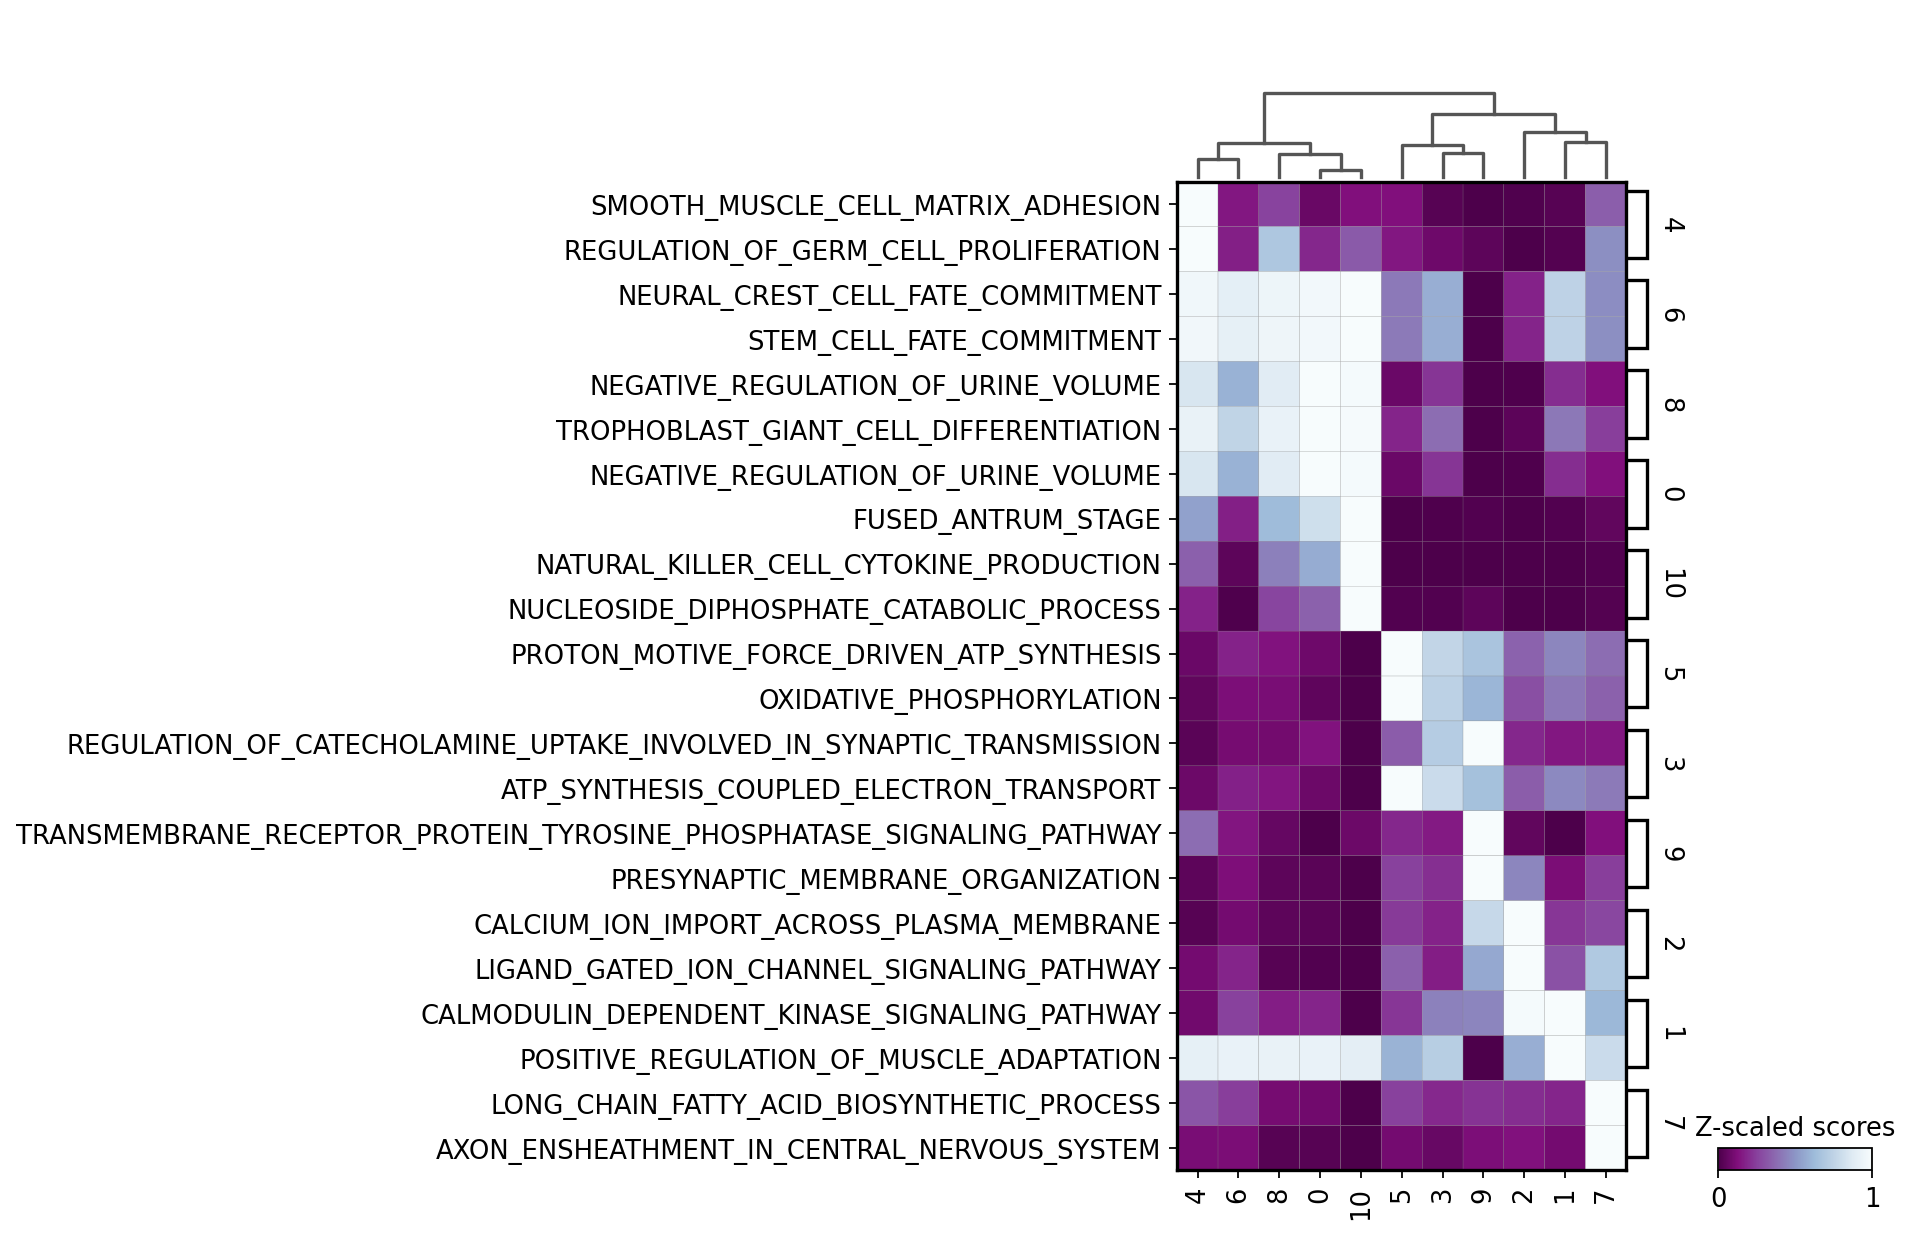

In [37]:
sc.pl.matrixplot(acts, term_markers, 'leiden', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='BuPu_r', swap_axes=True)